In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
import os
import time

def meanWithInacc(arr):
    mean = np.mean(arr)
    n = len(arr)

    rand_inacc = np.sqrt(sum([ 1 / (n * (n - 1)) * (x - mean)**2 for x in arr]))

    return [mean, rand_inacc]

In [2]:
N = 8
COMPILERS = ["g++ -O2", "g++ -O3", "clang++ -O2", "clang++ -O3", "g++ -O3 volatile"]

def measure(N, call):
    times = []
    ret = []

    for i in range(N):

        time_beg = time.time()

        stream = os.popen(call)
        res = int(stream.read())

        ret.append(res)

        times.append(time.time() - time_beg)

    return ret, times

results = [0] * (len(COMPILERS) * 3)

In [3]:
tmp = measure(N, "./gcc_O3_vol 1 2") # прогрев проца

In [4]:
results[0] = measure(N, "./gcc_O2 1 0")
results[1] = measure(N, "./gcc_O2 1 1")
results[2] = measure(N, "./gcc_O2 1 2")

In [5]:
results[3] = measure(N, "./gcc_O3 1 0")
results[4] = measure(N, "./gcc_O3 1 1")
results[5] = measure(N, "./gcc_O3 1 2")

In [6]:
results[6] = measure(N, "./clang_O2 1 0")
results[7] = measure(N, "./clang_O2 1 1")
results[8] = measure(N, "./clang_O2 1 2")

In [7]:
results[9]  = measure(N, "./clang_O3 1 0")
results[10] = measure(N, "./clang_O3 1 1")
results[11] = measure(N, "./clang_O3 1 2")

In [8]:
results[12] = measure(N, "./gcc_O3_vol 1 0")
results[13] = measure(N, "./gcc_O3_vol 1 1")
results[14] = measure(N, "./gcc_O3_vol 1 2")

In [69]:
print("""|   | Naive | Vector no AVX | Vector AVX |
|---|:-----:|:-------------:|:----------:|""")

for i in range(len(COMPILERS)):
    print("| `" + COMPILERS[i] + "` | %.1f | %.1f | %.1f |" % (np.mean(results[i * 3][1]),
                                                             np.mean(results[i * 3 + 1][1]),
                                                             np.mean(results[i * 3 + 2][1])))

|   | Naive | Vector no AVX | Vector AVX |
|:-:|:-----:|:-------------:|:----------:|
| `g++ -O2` | 36.8 | 5.8 | 5.7 |
| `g++ -O3` | 37.0 | 19.5 | 5.7 |
| `clang++ -O2` | 36.4 | 11.2 | 5.7 |
| `clang++ -O3` | 36.5 | 11.2 | 5.7 |
| `g++ -O3 volatile` | 36.7 | 19.3 | 5.7 |


In [73]:
print("""
|   | Naive * 1e5 | Vector no AVX * 1e5 | Vector AVX * 1e5 |
|---|:-----:|:-------------:|:----------:|""")

ans = []
text_ans = []

for i in range(len(COMPILERS) * 3):
    mean = meanWithInacc(results[i][0])

    ans.append(mean)

    if i % 3 == 0:
        print("| `" + COMPILERS[i // 3] + "` | ", end = "")

    print(str(int(np.round(mean[0] / 1e5))) + " ± " + str(int(np.round(mean[1] / 1e5))) + " | ", end = "")

    if i % 3 == 2:
        print()




|   | Naive * 1e5 | Vector no AVX * 1e5 | Vector AVX * 1e5 |
|---|:-----:|:-------------:|:----------:|
| `g++ -O2` | 9520 ± 5 | 1466 ± 4 | 1455 ± 6 | 
| `g++ -O3` | 9560 ± 10 | 5022 ± 27 | 1456 ± 3 | 
| `clang++ -O2` | 9406 ± 8 | 2887 ± 13 | 1455 ± 4 | 
| `clang++ -O3` | 9436 ± 9 | 2876 ± 10 | 1458 ± 3 | 
| `g++ -O3 volatile` | 9474 ± 5 | 4982 ± 15 | 1450 ± 2 | 


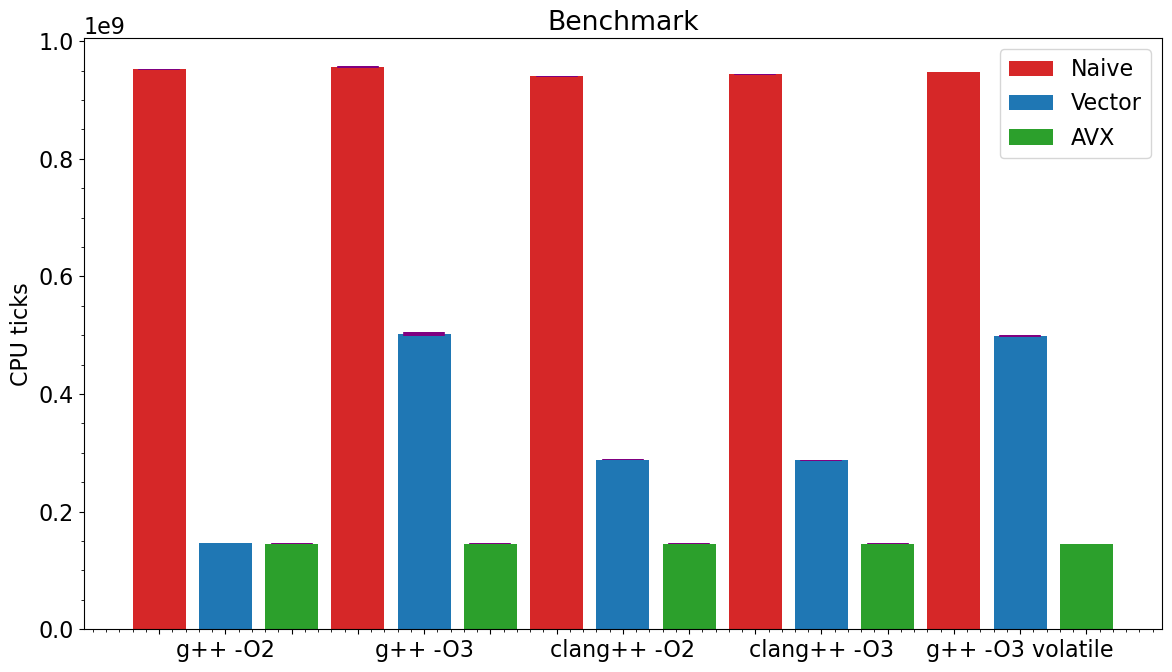

In [71]:
mpl.rcParams['font.size'] = 16
plt.figure(figsize = (12,7), facecolor = "white")

labels = []
for i in COMPILERS:
    labels.append(" ")
    labels.append(i)
    labels.append(" ")
y = [ans_[0] for ans_ in ans]
err_y = [ans_[1] for ans_ in ans]
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

spaces = "                                     "

bars = []
for i in range(len(y)):
    bars.append(plt.bar(COMPILERS[i // 3] if i % 3 == 1 else (" " * (len(y) + 1))[:i + 1], y[i], color = bar_colors[i % 3], yerr = err_y[i], error_kw=dict(lw=30), ecolor = "purple"))
    #plt.bar_label(bars[-1], color = "w")



plt.legend(["Naive", "Vector", "AVX"], loc='upper right')

plt.ylabel("CPU ticks")
plt.title("Benchmark")

plt.minorticks_on()
plt.tight_layout()

plt.savefig("img/plot.png")
plt.show()

In [72]:
NAMES = []

for label in COMPILERS:
    NAMES.append("Naive<br>`" + label + "`")
    NAMES.append("Vector<br>`" + label + "`")
    NAMES.append("AVX<br>`" + label + "`")

print("| col / row ", end = "")
for i in NAMES:
    print("| " + i + " ", end = "")
print("|")

print("|---" + "|:-:" * len(NAMES) + "|")

for i in range(len(NAMES)):
    print("| " + NAMES[i] + " ", end = "")
    for j in range(len(NAMES)):
        if i != j:
            print("| %.2f " % (ans[i][0] / ans[j][0]), end = "")
        else:
            print("| 1 ", end = "")
    print("|")


| col / row | Naive<br>`g++ -O2` | Vector<br>`g++ -O2` | AVX<br>`g++ -O2` | Naive<br>`g++ -O3` | Vector<br>`g++ -O3` | AVX<br>`g++ -O3` | Naive<br>`clang++ -O2` | Vector<br>`clang++ -O2` | AVX<br>`clang++ -O2` | Naive<br>`clang++ -O3` | Vector<br>`clang++ -O3` | AVX<br>`clang++ -O3` | Naive<br>`g++ -O3 volatile` | Vector<br>`g++ -O3 volatile` | AVX<br>`g++ -O3 volatile` |
|---|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Naive<br>`g++ -O2` | 1 | 6.49 | 6.55 | 1.00 | 1.90 | 6.54 | 1.01 | 3.30 | 6.54 | 1.01 | 3.31 | 6.53 | 1.00 | 1.91 | 6.57 |
| Vector<br>`g++ -O2` | 0.15 | 1 | 1.01 | 0.15 | 0.29 | 1.01 | 0.16 | 0.51 | 1.01 | 0.16 | 0.51 | 1.01 | 0.15 | 0.29 | 1.01 |
| AVX<br>`g++ -O2` | 0.15 | 0.99 | 1 | 0.15 | 0.29 | 1.00 | 0.15 | 0.50 | 1.00 | 0.15 | 0.51 | 1.00 | 0.15 | 0.29 | 1.00 |
| Naive<br>`g++ -O3` | 1.00 | 6.52 | 6.57 | 1 | 1.90 | 6.56 | 1.02 | 3.31 | 6.57 | 1.01 | 3.32 | 6.56 | 1.01 | 1.92 | 6.59 |
| Vector<br>`g++ -O3` | 0.53 | 3.43 | 3.45 | 0.53 | 1 | 3.45

In [68]:
print("| # ", end = "")
for i in NAMES:
    print("| " + i + " ", end = "")
print("|")

print("|:-:" * (len(NAMES) + 1) + "|")

for i in range(N):
    print("| {} |".format(i + 1), end = "")
    for j in range(len(NAMES)):
        print(" {} |".format(results[j][0][i]), end = "")
    print()

| # | Naive<br>g++ -O2 | Vector<br>g++ -O2 | AVX<br>g++ -O2 | Naive<br>g++ -O3 | Vector<br>g++ -O3 | AVX<br>g++ -O3 | Naive<br>clang++ -O2 | Vector<br>clang++ -O2 | AVX<br>clang++ -O2 | Naive<br>clang++ -O3 | Vector<br>clang++ -O3 | AVX<br>clang++ -O3 | Naive<br>g++ -O3 volatile | Vector<br>g++ -O3 volatile | AVX<br>g++ -O3 volatile |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | 951289745 | 145591101 | 144455335 | 954894881 | 504535956 | 145260241 | 939651134 | 290497736 | 147098087 | 943167489 | 287512619 | 145428832 | 948109790 | 496397027 | 145668508 |
| 2 | 954214679 | 147813479 | 146065958 | 956922193 | 495835068 | 146574314 | 941371955 | 293544671 | 145301655 | 942297629 | 285384865 | 146602422 | 947449792 | 496647743 | 144891270 |
| 3 | 953298565 | 148790337 | 145564753 | 958869251 | 497547198 | 146715981 | 942937875 | 288420373 | 146038170 | 941252476 | 290772782 | 146930470 | 947693052 | 494036886 | 145013260 |
| 4 | 952093549 | 146279456 | 147945257